In [1]:
import random
import matplotlib.pyplot as plt

In [2]:
def fifo(page_references, num_frames):
    # Implementação do algoritmo FIFO
    frames = []         # Lista para armazenar os frames de página na memória
    page_faults = 0     # Contador de faltas de página

    for page in page_references:
        # Verifica se a página não está nos frames
        if page not in frames:
            # Se não estiver, verifica se há espaço nos frames
            if len(frames) < num_frames:
                # Se houver espaço, adiciona a página no final dos frames
                frames.append(page)
            else:
                # Se não houver espaço, remove a página mais antiga e adiciona a nova no final
                frames.pop(0)
                frames.append(page)
            page_faults += 1

    return page_faults


In [3]:
def aging(page_references, num_frames, aging_bits):
    # Implementação do algoritmo de envelhecimento
    frames = {}         # Dicionário para armazenar páginas e seus bits de envelhecimento
    page_faults = 0     # Contador de faltas de página

    for page in page_references:
        # Verifica se a página não está nos frames
        if page not in frames:
            # Se não estiver, verifica se há espaço nos frames
            if len(frames) < num_frames:
                # Se houver espaço, adiciona a página com bits de envelhecimento iniciais
                frames[page] = aging_bits
            else:
                # Se não houver espaço, substitui a página com o menor valor de envelhecimento
                min_page = min(frames, key=frames.get)
                frames.pop(min_page)
                frames[page] = aging_bits
            page_faults += 1

        # Atualiza bits de envelhecimento para todas as páginas nos frames
        for p in frames:
            frames[p] >>= 1  # Desloca para a direita para simular o envelhecimento
            if p == page:
                frames[p] |= (1 << (aging_bits - 1))  # Define o bit mais significativo para a página atual

    return page_faults

Num. Molduras: 1 | Faltas de Página (FIFO): 9903 | Faltas de Página (Aging): 9903
Num. Molduras: 2 | Faltas de Página (FIFO): 9806 | Faltas de Página (Aging): 9808
Num. Molduras: 3 | Faltas de Página (FIFO): 9685 | Faltas de Página (Aging): 9687
Num. Molduras: 4 | Faltas de Página (FIFO): 9584 | Faltas de Página (Aging): 9581
Num. Molduras: 5 | Faltas de Página (FIFO): 9470 | Faltas de Página (Aging): 9470
Num. Molduras: 6 | Faltas de Página (FIFO): 9375 | Faltas de Página (Aging): 9376
Num. Molduras: 7 | Faltas de Página (FIFO): 9285 | Faltas de Página (Aging): 9291
Num. Molduras: 8 | Faltas de Página (FIFO): 9189 | Faltas de Página (Aging): 9193
Num. Molduras: 9 | Faltas de Página (FIFO): 9091 | Faltas de Página (Aging): 9084
Num. Molduras: 10 | Faltas de Página (FIFO): 9009 | Faltas de Página (Aging): 9001


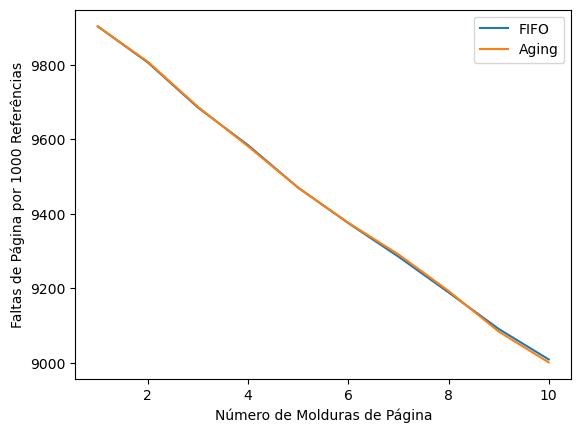

In [4]:
def generate_page_references(num_references, num_pages):
    # Gera uma sequência aleatória de referências de página
    return [random.randint(0, num_pages - 1) for _ in range(num_references)]

def main():
    num_references = 10000
    num_pages = 100
    aging_bits = 8
    num_frames_range = range(1, 11)  # Testa com 1 a 10 molduras de página

    fifo_page_faults = []
    aging_page_faults = []

    page_references = generate_page_references(num_references, num_pages)

    for num_frames in num_frames_range:
        # Testa os algoritmos FIFO e de Envelhecimento para diferentes números de frames
        fifo_faults = fifo(page_references, num_frames)
        aging_faults = aging(page_references, num_frames, aging_bits)

        fifo_page_faults.append(fifo_faults)
        aging_page_faults.append(aging_faults)

        # Imprime os resultados na console
        print(f"Num. Molduras: {num_frames} | Faltas de Página (FIFO): {fifo_faults} | Faltas de Página (Aging): {aging_faults}")

    # Plota os resultados em um gráfico
    plt.plot(num_frames_range, fifo_page_faults, label='FIFO')
    plt.plot(num_frames_range, aging_page_faults, label='Aging')
    plt.xlabel('Número de Molduras de Página')
    plt.ylabel('Faltas de Página por 1000 Referências')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
